In [23]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_boston
from random import seed
from random import randrange
from csv import reader
from math import sqrt
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error

In [24]:
X = load_boston().data
Y = load_boston().target

In [26]:
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)

In [27]:
clf = SGDRegressor()
clf.fit(X, Y)
print(mean_squared_error(Y, clf.predict(X)))

22.671507433665266


In [28]:
#optimal w by using SGDRegressor of sklearn
clf.coef_

array([-0.65782215,  0.69220463, -0.3875049 ,  0.79180405, -0.9731496 ,
        3.14578327, -0.06758432, -2.17234951,  1.01459901, -0.68197219,
       -1.83869529,  0.89040915, -3.51316493])

In [29]:
#making Y as an array with dimension of (506,1)
Y1 = np.array([Y])
Y1 = Y1.T
Y1.shape

(506, 1)

<h3>Plotting a chart of predicted values Vs actual values of SGDRegresser of sklearn</h3>

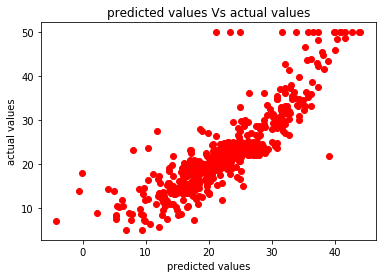

In [30]:
import matplotlib.pyplot as plt

plt.scatter(clf.predict(X), Y, color = 'red')
plt.title('predicted values Vs actual values')
plt.xlabel('predicted values')
plt.ylabel('actual values')
plt.show()


In [31]:
#observation:In the above plot, most of the predicated_Y values and actual_Y values are overlapping

In [35]:
#implementing SGD on load_boston datasets

w = np.array([[0,0,0,0,0,0,0,0,0,0,0,0,0]])#weight vector
b = np.array([[0]])#intercept
r = 0.01#learning rate
d2 = np.array([[0]])
X1 = X
def pred_w(w,b,X2,Y2):#this function calculate dl/dw by taking batch_size(k) = n data points 
    v4 = np.array([[0,0,0,0,0,0,0,0,0,0,0,0,0]])
    k = len(X2)
    for p in range(0,k):
        v1 = -2*X2[[p]]
        v2 = np.dot(X2[[p]],w.T)
        v3 = Y2[[p]] - v2 - b
        v4 = v4 + np.dot(v3,v1)
    return v4/k 

def pred_b(w,b,X2,Y2):#this function calculate dl/db by taking batch_size(k) = n data points
    x1 = np.array([[0]])
    k = len(X2)
    for p in range(0,k):
        x2 = np.dot(X2[[p]],w.T)
        x3 = Y2[[p]] - x2 - b
        x1 = x1 + -2*x3
    return x1/k

for i in range(0,1000):#1000 epochs are used to find optimal w* and b*
    w = w - r*pred_w(w,b,X1,Y1)
    b = b - r*pred_b(w,b,X1,Y1)     
for i in range(0,506):#this loop is used calculate mean square error with optimal value of w* and b*
    d1 = Y[[i]] - (np.dot(X[[i]],w.T) + b)
    d2 = d2 + d1*d1
d3 = d2/506
print("mean square error is "+str(d3[0][0]))  

mean square error is 21.956871902749725


In [11]:
#optimal w of own implemented sgd
w[0]

array([-0.86502817,  0.98458343, -0.09241126,  0.71544891, -1.94161996,
        2.73414667, -0.02709495, -3.05571367,  2.04626934, -1.41192996,
       -2.02590111,  0.85696845, -3.72001961])

<h3>Plotting a chart of predicted values Vs actual values of own SGD Implementation</h3>

In [74]:
y_pred = np.array([0])
for i in range(0,506):
    y_pred = np.dot(X,w.T) + b#here y_pred has dimension of (506,1)
y_pred = y_pred.T#here y_pred has dimension of (1,506)
y_pred = y_pred[0]#here y_pred has dimension of(506,).This is done because actual_Y has also dimension of (506,)

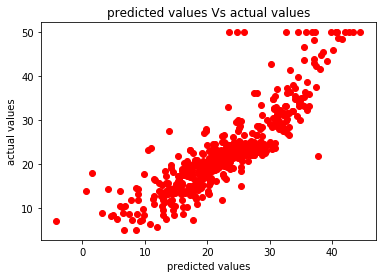

In [75]:
import matplotlib.pyplot as plt

plt.scatter(y_pred, Y, color = 'red')
plt.title('predicted values Vs actual values')
plt.xlabel('predicted values')
plt.ylabel('actual values')
plt.show()

In [76]:
#observation:In the above plot, most of the predicated_Y values and actual_Y values are overlapping

In [77]:
#this is the comparision between each elements of weight vector

from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["weights of SGDRegresser of sklearn", "weights of own Implemented SGD"]

x.add_row([-0.58064815, -0.86502817])
x.add_row([0.5432434, 0.98458343])
x.add_row([-0.32200154, -0.09241126])
x.add_row([0.76125178, 0.71544891])
x.add_row([-1.19245234, -1.94161996])
x.add_row([3.08067451, 2.73414667])
x.add_row([-0.12607766, -0.02709495])
x.add_row([-2.12259154, -3.05571367])
x.add_row([0.8586491, 2.04626934])
x.add_row([-0.52013375, -1.41192996])
x.add_row([-1.8143906, -2.02590111])
x.add_row([0.87640027, 0.85696845])
x.add_row([-3.45060909, -3.72001961])
print(x)

+------------------------------------+--------------------------------+
| weights of SGDRegresser of sklearn | weights of own Implemented SGD |
+------------------------------------+--------------------------------+
|            -0.58064815             |          -0.86502817           |
|             0.5432434              |           0.98458343           |
|            -0.32200154             |          -0.09241126           |
|             0.76125178             |           0.71544891           |
|            -1.19245234             |          -1.94161996           |
|             3.08067451             |           2.73414667           |
|            -0.12607766             |          -0.02709495           |
|            -2.12259154             |          -3.05571367           |
|             0.8586491              |           2.04626934           |
|            -0.52013375             |          -1.41192996           |
|             -1.8143906             |          -2.02590111     

In [78]:
#comparision between MSE of sdgRegression of sklearn and MSE of own implemented sgd

from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["Model", "MSE"]

x.add_row(["SGDRegresser of sklearn", 22.728])
x.add_row(["own Implemented SGD", 21.956])
print(x)

+-------------------------+--------+
|          Model          |  MSE   |
+-------------------------+--------+
| SGDRegresser of sklearn | 22.728 |
|   own Implemented SGD   | 21.956 |
+-------------------------+--------+
